<a href="https://colab.research.google.com/github/vrose99/ds4bme/blob/master/Quiz4_vrose9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Victoria Rose
### vrose9@jh.edu
### Quiz 4

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm

# Question 1

In [139]:
# Download in the data if it's not already there
! if [ ! -e kirby21.csv ]; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi;

# Read in the data and display a few rows
dat = pd.read_csv("kirby21.csv")
#dat['csf'] = dat['icv'] - dat['tbv'] 
dat.head()

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519
4,5,kirby127a_3_1_ax.img,Mesencephalon,10268,55.0,307.0,230.8583,29.2249,1,1,127,1378295,1268519


In [140]:
# Make a data Frame
df = pd.read_csv("kirby21.csv")
df_L = df.loc[df['roi']=='Diencephalon_L']
df_R = df.loc[df['roi']=='Diencephalon_R']
df_y = df.loc[df['roi']=='CSF']
#df_L.head()
#df_R.head()
x1 = df_L['volume'].tolist()
x2 = df_R['volume'].tolist()
y_temp = df_y['volume'].tolist()
y = []
for i in range(len(y_temp)):
  if i % 2 == 0:
    y.append(y_temp[i])
#will be the same whether taken from df_L or df_R
#pred = pd.DataFrame([x1, x2, y],columns=['x1','x2','y'])
df = pd.DataFrame([x1,x2,y])
df = df.transpose()
df.columns = ['x1','x2','y']
df.head()

,x1,x2,y
0,9683,9678,109776
1,9156,9071,107334
2,8937,9004,94254
3,8828,8933,67156
4,9749,9722,110114


In [141]:
results = smf.ols('y ~ x1+ x2', data = df).fit()
print(results.summary2())

                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.128     
Dependent Variable:   y                 AIC:                 454.0017  
Date:                 2019-09-27 02:23  BIC:                 456.9889  
No. Observations:     20                Log-Likelihood:      -224.00   
Df Model:             2                 F-statistic:         2.394     
Df Residuals:         17                Prob (F-statistic):  0.121     
R-squared:            0.220             Scale:               3.6842e+08
-----------------------------------------------------------------------
            Coef.     Std.Err.     t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------
Intercept -2449.7146 59324.5017 -0.0413 0.9675 -127613.4723 122714.0432
x1           23.9403    21.0337  1.1382 0.2708     -20.4370     68.3175
x2          -13.7653    23.3248 -0.5902 0.5628     -62.9763     35.4458
------------

#### Interpret the Coefficients

The coefficients for x1 and x2 represent how much a one unit change of that particular variable (one more cubic mm of left or right diencephalon) would change the estimated CSF volume if the other variable were held constant.

# Question 2

In [0]:
# Download in the data if it's not already there
! if [ ! -e binary.csv ]; \
then wget https://stats.idre.ucla.edu/stat/data/binary.csv; \
fi;

In [143]:
dat = pd.read_csv("binary.csv")
dat.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [171]:
trainFraction = .75
x = dat[['gre','gpa','rank']]
y = dat[['admit']]
x = sm.tools.add_constant(x)
sample = np.random.uniform(size = 400) < trainFraction
trainingDat = dat[sample]
testingDat = dat[~sample]
xtraining = x[sample]
xtesting = x[~sample]
ytraining = y[sample]
ytesting = y[~sample]
model = sm.discrete.discrete_model.Logit(ytraining, xtraining).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.581730
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  312
Model:                          Logit   Df Residuals:                      308
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Sep 2019   Pseudo R-squ.:                 0.06526
Time:                        02:45:58   Log-Likelihood:                -181.50
converged:                       True   LL-Null:                       -194.17
Covariance Type:            nonrobust   LLR p-value:                 1.309e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9317      1.270     -2.308      0.021      -5.422      -0.442
gre            0.0018      0.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Part b:
The coefficients for gre, gpa, and rank represent how much a one unit change of that particular variable would change the output if all other variables were held constant. Ie: an increase in gre score by one point, with no change in gpa or rank, would be anticipated to increase the output by 0.0018 based off of this model

In [0]:
thresh = np.arange(0,1,0.01).tolist()
yhat = model.predict(xtesting).tolist()
ytesting = ytesting.values
yhat_temp = np.zeros(len(yhat))
results = np.zeros((len(thresh),4))
for j in range(len(thresh)):
  true_pos = 0
  true_neg = 0
  false_pos = 0
  false_neg = 0
  for k in range(len(yhat)):
    if yhat[k] >= thresh[j]:
      yhat_temp[k] = 1
    else:
      yhat_temp[k] = 0
  #print(yhat_temp)
  for i in range(len(yhat)):
    if (yhat_temp[i] == 1) and (ytesting[i] == 1): #true pos
      true_pos += 1
    elif (yhat_temp[i] == 1) and (ytesting[i] == 0): 
      false_pos += 1
    elif (yhat_temp[i] == 0) and (ytesting[i] == 0):
      true_neg += 1
    else:
      false_neg += 1
  results[j,0] = true_pos
  results[j,1] = false_pos
  results[j,2] = true_neg
  results[j,3] = false_neg
    

In [0]:
sensitivity = np.zeros(len(results[:,0]))
specificity = np.zeros(len(results[:,0]))
#accuracy = np.zeros(len(results[:,0]))
good = results[:,0] + results[:,3]
total = sum(results[1,:])
accuracy = good/total
for i in range(len(results[:,0])):
  sensitivity[i] = results[i,0]/(results[i,0]+results[i,3])
  specificity[i] = results[i,2]/(results[i,2]+results[i,1])
  accuracy[i] = (results[i,0]+results[i,2])/(sum(results[1,:]))
  #print(sum)

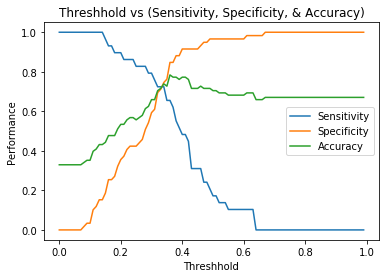

In [204]:
plt.figure()
plt.plot(thresh,sensitivity)
plt.plot(thresh,specificity)
plt.plot(thresh,accuracy)
plt.title('Threshhold vs (Sensitivity, Specificity, & Accuracy)')
plt.ylabel('Performance')
plt.xlabel('Threshhold')
plt.legend(['Sensitivity','Specificity','Accuracy'])


# Question 3